In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('Polynomial Regression.csv')
data.head()

,year,shanghai_GDP,cpi,house_popula_mean
0,1978,272.81,100.0,3.77
1,1979,286.43,100.9,3.82
2,1980,311.89,106.9,3.77
3,1981,324.76,108.3,3.70
4,1982,337.07,108.7,3.67


In [3]:
data.drop(['year'], axis=1).describe()

,shanghai_GDP,cpi,house_popula_mean
count,38.000000,38.000000,38.000000
mean,6507.400789,407.578947,3.034737
std,7648.870836,227.130758,0.373904
min,272.810000,100.000000,2.690000
25%,571.170000,154.700000,2.750000
50%,3198.170000,518.650000,2.840000
75%,10241.095000,572.475000,3.267500
max,25123.450000,748.400000,3.820000


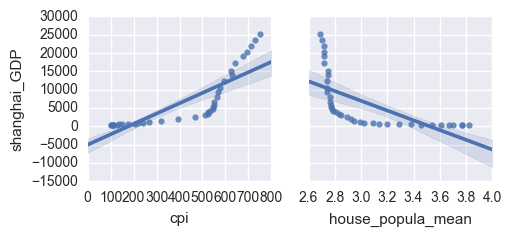

In [4]:
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP']]
target = ['shanghai_GDP']
g = sns.pairplot(data, kind="reg", x_vars= feature, y_vars=target)

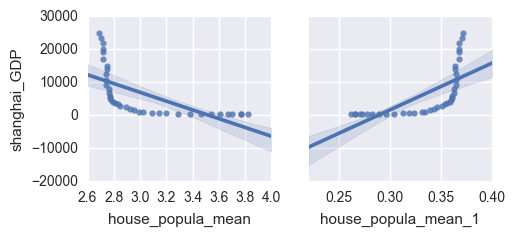

In [5]:
data['house_popula_mean_1'] = 1/data.house_popula_mean
g = sns.pairplot(data.drop(['year'], axis = 1), kind="reg",
                 x_vars=['house_popula_mean', 'house_popula_mean_1'], y_vars=target)

In [6]:
def lr_fit_predict(X_train, X_test, y_train, y_test):
    lr = linear_model.LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    RSS = np.mean((pred - y_test) ** 2)
    R_squares = lr.score(X_test, y_test)
    print('Coefficients:\n', lr.coef_)
    print('intercept:', lr.intercept_)
    print("Residual sum of squares: %.2f" % RSS)
    print('Variance score: %.3f' % R_squares)
    plt.plot(range(len(data)),data.shanghai_GDP,'b', label="original data")  
    plt.plot(range(len(data)),lr.predict(data[feature]),'r',label="predict")  
    plt.legend(loc="upper right")
    plt.xlabel("the number of sales")  
    plt.ylabel('value of sales')

Coefficients:
 [[  5.40176640e+01  -1.67133720e+05]]
intercept: [ 40277.11251265]
Residual sum of squares: 13844089.36
Variance score: 0.784


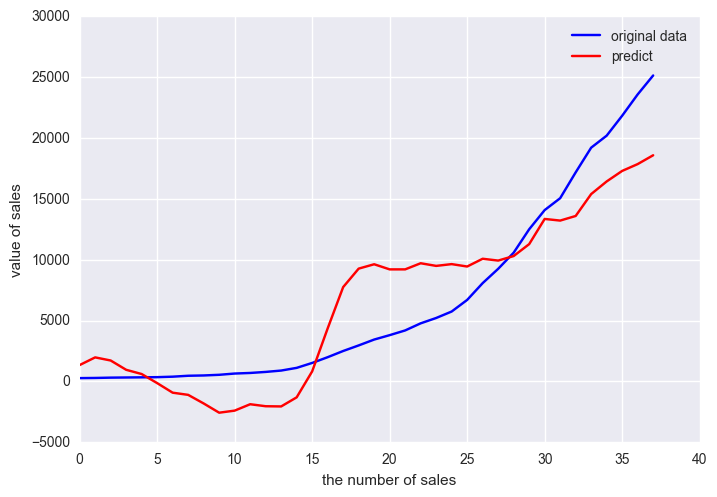

In [7]:
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP', 'house_popula_mean']]
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)
lr_fit_predict(X_train, X_test, y_train, y_test)

Coefficients:
 [[   -555.93811634 -101467.86763682    1558.41276358]]
intercept: [ 42665.52202685]
Residual sum of squares: 5734974.38
Variance score: 0.911


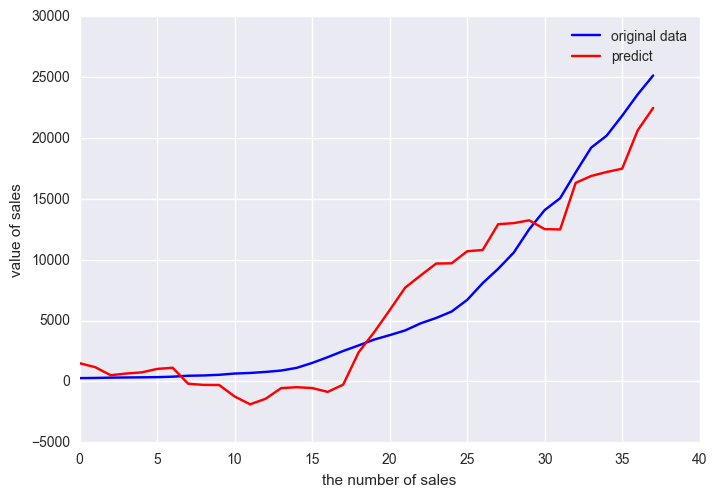

In [8]:
data['house_popula_mean_1_&_cpi_square'] = data.house_popula_mean_1*data.cpi
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP', 'house_popula_mean']]
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)
lr_fit_predict(X_train, X_test, y_train, y_test)

Coefficients:
 [[ -6.63738813e+02   2.65415867e+06   1.97016721e+03  -4.77046220e+06]]
intercept: [-354281.48960859]
Residual sum of squares: 2107352.56
Variance score: 0.967


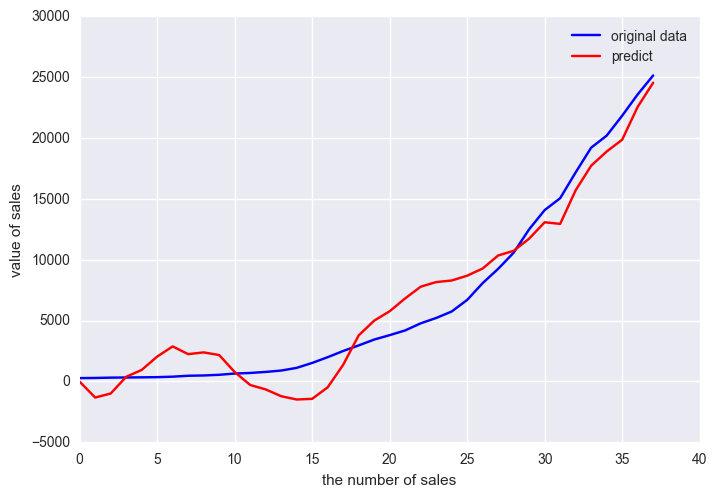

In [9]:
data['house_popula_mean_1_square'] = data.house_popula_mean_1**2
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP', 'house_popula_mean']]
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)
lr_fit_predict(X_train, X_test, y_train, y_test)

Coefficients:
 [[  1.35928457e+02  -1.38650034e+06  -9.11680985e+02   2.81563644e+06
    2.26464577e-01]]
intercept: [ 178474.93328165]
Residual sum of squares: 1258953.39
Variance score: 0.980


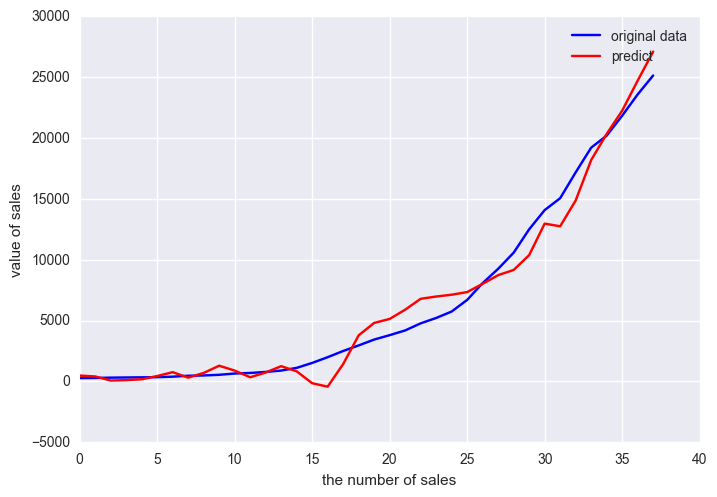

In [10]:
data['cpi_square'] = data.cpi**2
feature = [x for x in data.columns if x not in ['year', 'shanghai_GDP', 'house_popula_mean']]
X_train, X_test, y_train, y_test = train_test_split(data[feature], data[target], test_size=0.25, random_state=27)
lr_fit_predict(X_train, X_test, y_train, y_test)